# Harry Potter and the Philosopher's Stone 

## A statistical and literary analysis

### Initialization:

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import nltk
import re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
sns.set_style("whitegrid")
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
#nltk.download('averaged_perceptron_tagger')
#nltk.download('punkt')

In [106]:
book1 = open('book_1.txt').read()
book2 = open('book_2.txt').read()

In [107]:
book1 = book1.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("\'", "'")
book2 = book2.replace('\xad', '').replace('\u00ad', '').replace('\N{SOFT HYPHEN}', '').replace('“', '"').replace('”', '"').replace('—', '-').replace('…', '...').replace("\'", "'")


In [108]:
class Chapter:
    def __init__(self, number, title, body):
        self.number = number
        self.title = title
        self.body = body
        wc = 0
        for sent in self.body:
            wc += len(sent.split(' '))
        self.wc = wc

In [109]:
class Book:
    def __init__(self, title, author, chapters):
        self.title = title
        self.author = author
        self.chapters = chapters
        self.num_chapters = len(self.chapters)
        self.wc = 0
        for i in range(self.num_chapters):
            self.wc += self.chapters[i].wc
            
    ## flag: t-title, b-body, w-wc, c-chapter, plain-plain body text
    def get(self, num, flag='c'):
        if flag == 't':
            return self.chapters[num-1].title
        elif flag == 'b':
            return self.chapters[num-1].body
        elif flag == 'w':
            return self.chapters[num-1].wc
        elif flag == 'c':
            return self.chapters[num-1]
        elif flag == 'plain':
            return ' '.join(self.chapters[num-1].body)
        else:
            print("Check flag parameter")

In [110]:
def book_creator(text):
    tmp = text.split('\n')
    sents = [s for s in tmp if s != '']
    title = sents[0]
    author = sents[2]
    sents = sents[sents.index('Chapter 1'):]
    
    indicies = []
    chapters = []
    
    for i in range(len(sents)):
        if re.findall("Chapter", sents[i]):
            indicies.append(i)
    
    for i in range(len(indicies)):
        ch_number = int(''.join(list(filter(str.isdigit, sents[indicies[i]]))))
        ch_title = sents[indicies[i]+1]
        if i != len(indicies) - 1:
            ch_body = sents[indicies[i]+2:indicies[i+1]]
        else:
            ch_body = sents[indicies[i]+2:]
                
        chapters.append(Chapter(ch_number, ch_title, ch_body))
                
    return Book(title, author, chapters)

In [111]:
HP = book_creator(book1)

### Word Count 

In [8]:
wc_list = []
for i in range(HP.num_chapters):
    wc_list.append(HP.get(i, 'w'))
    
print(wc_list)

[5604, 4664, 3474, 3893, 3772, 6668, 6356, 4517, 3064, 4975, 4317, 3394, 5548, 3222, 3511, 5146, 6537]


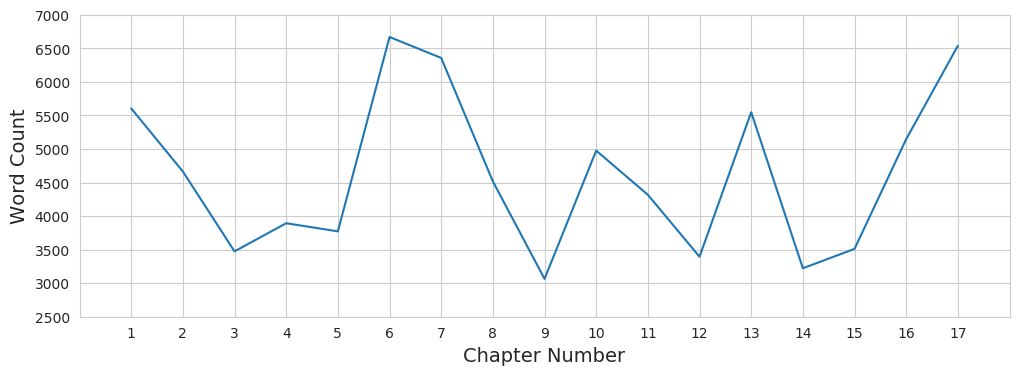

In [9]:
ax = plt.subplots(figsize=(12,4),dpi=100)
ax = sns.lineplot(x=list(range(1, (HP.num_chapters + 1))), y=wc_list)
ax.set_ylim(2500, 7000)
ax.set_xlim(0, 18)
ax.set_xlabel("Chapter Number", fontsize=14)
ax.set_ylabel("Word Count", fontsize=14)
_ = ax.set_xticks(list(range(1, (HP.num_chapters + 1))))

### Sentence Length 

In [10]:
sent_len_list = []
for i in range(1, (HP.num_chapters + 1)):
    sum = 0
    body = HP.get(i, 'b')
    for s in body:
        sum += len(s.split(' '))
    sent_len_list.append(sum/len(body))

print(sent_len_list)
    

[42.4, 34.74, 29.270676691729324, 24.65359477124183, 22.835616438356166, 22.146341463414632, 24.155080213903744, 33.30434782608695, 23.578199052132703, 26.323170731707318, 24.773722627737225, 26.932038834951456, 25.983870967741936, 25.258992805755394, 27.372340425531913, 20.428125, 24.471615720524017]


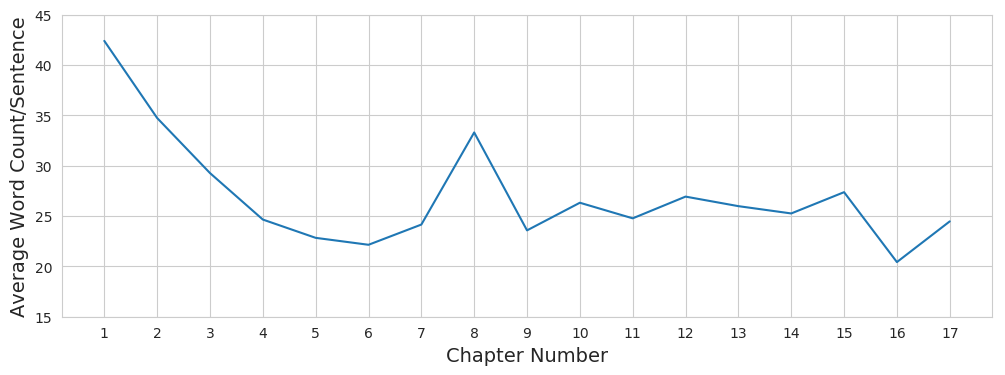

In [11]:
ax = plt.subplots(figsize=(12,4),dpi=100)
ax = sns.lineplot(x=list(range(1, (HP.num_chapters + 1))), y=sent_len_list)
ax.set_ylim(15, 45)
#ax.set_xlim(0, 18)
ax.set_xlabel("Chapter Number", fontsize=14)
ax.set_ylabel("Average Word Count/Sentence", fontsize=14)
_ = ax.set_xticks(list(range(1, (HP.num_chapters + 1))))

### Character name count

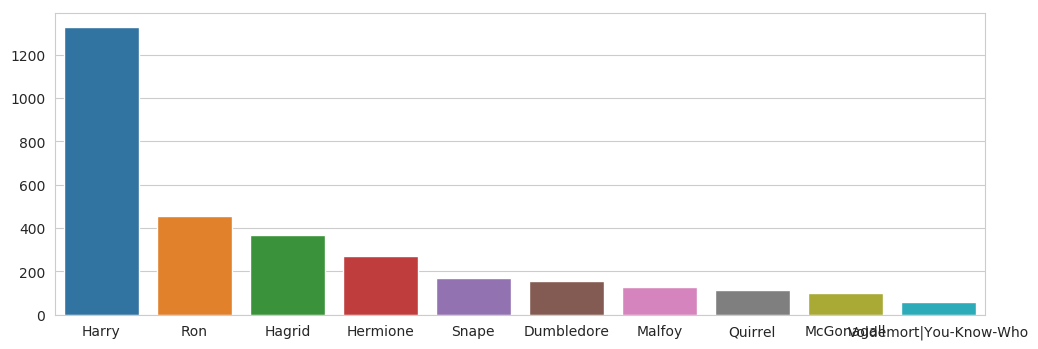

In [12]:
mains = ["Harry", "Ron", "Hagrid", "Hermione", "Snape", "Dumbledore", "Malfoy", "Quirrel", "McGonagall", "Voldemort|You-Know-Who"]
mains_count = [len(re.findall(m, book1)) for m in mains]

ax = plt.subplots(figsize=(12,4),dpi=100)
ax = sns.barplot(x=mains, y=mains_count)

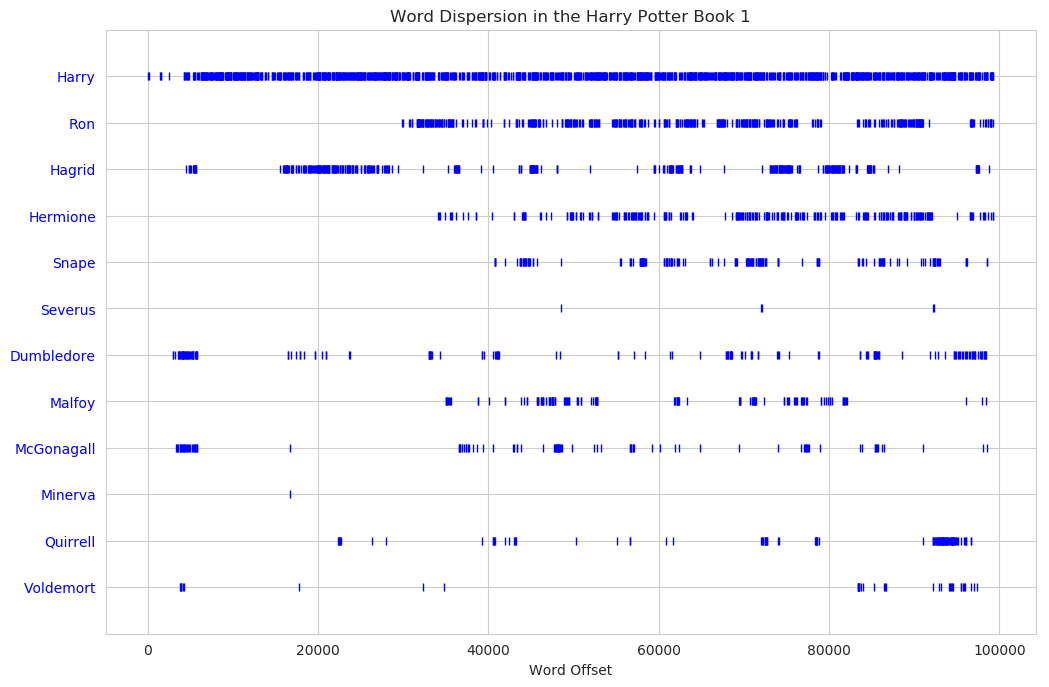

In [14]:
tokens = nltk.word_tokenize(book1)
mytext = nltk.Text(tokens)

words = ["Harry", "Ron", "Hagrid", "Hermione", "Snape", "Severus", "Dumbledore", "Malfoy", "McGonagall", "Minerva", "Quirrell", "Voldemort"]
plt.subplots(figsize=(12,8),dpi=100)
nltk.draw.dispersion.dispersion_plot(
    mytext, words, ignore_case=False,
    title='Word Dispersion in the Harry Potter Book 1'
)

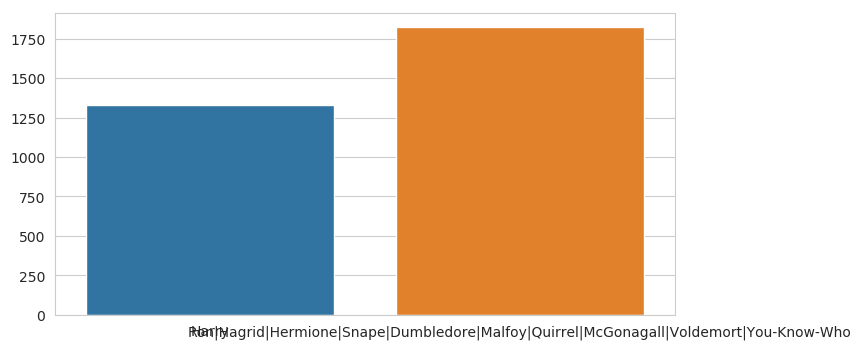

In [15]:
mains = ["Harry", "Ron|Hagrid|Hermione|Snape|Dumbledore|Malfoy|Quirrel|McGonagall|Voldemort|You-Know-Who"]
mains_count = [len(re.findall(m, book1)) for m in mains]
ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=mains, y=mains_count)

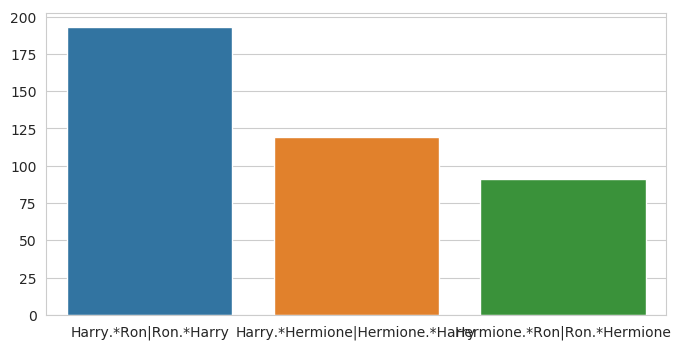

In [16]:
mains = ["Harry.*Ron|Ron.*Harry", "Harry.*Hermione|Hermione.*Harry", "Hermione.*Ron|Ron.*Hermione"]
mains_count = [len(re.findall(m, book1)) for m in mains]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=mains, y=mains_count)

### Locations count

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

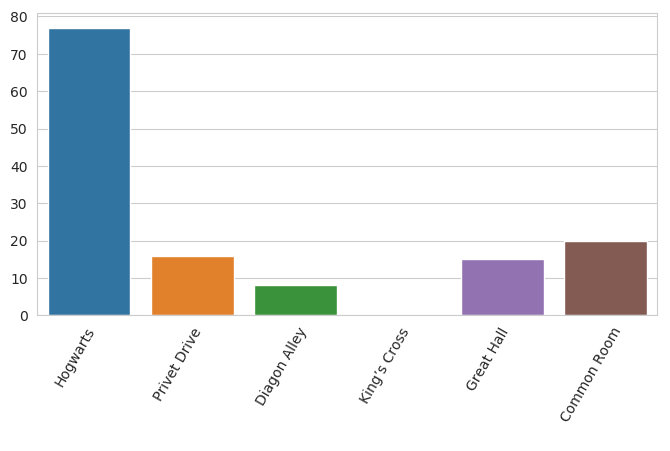

In [17]:
loc = ["Hogwarts", "Privet", "Diagon Alley", "King’s Cross", "Great Hall", "(c|C)ommon (r|R)oom"]
xticks = ["Hogwarts\n\n", "Privet Drive\n\n", "Diagon Alley\n\n", "King’s Cross\n\n", "Great Hall\n\n", "Common Room\n\n"]
loc_count = [len(re.findall(l, book1)) for l in loc]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=xticks, y=loc_count)
plt.xticks(rotation=60)

### Spell count

Text(0, 0.5, 'Count')

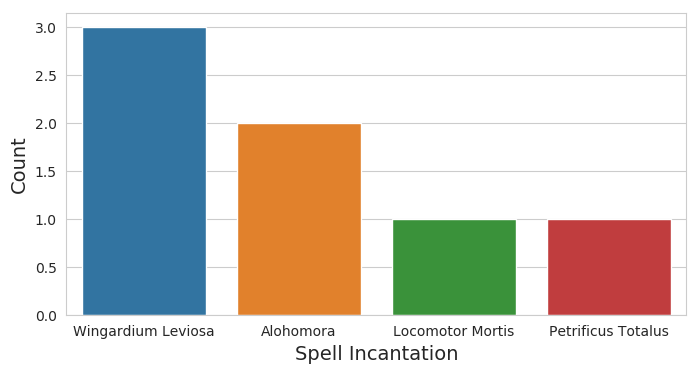

In [18]:
spells = ["Wingardium Leviosa", "Alohomora", "Locomotor Mortis", "Petrificus Totalus"]
spell_count = [len(re.findall(s, book1)) for s in spells]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=spells, y=spell_count)
ax.set_xlabel("Spell Incantation", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

### Subject mention count 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

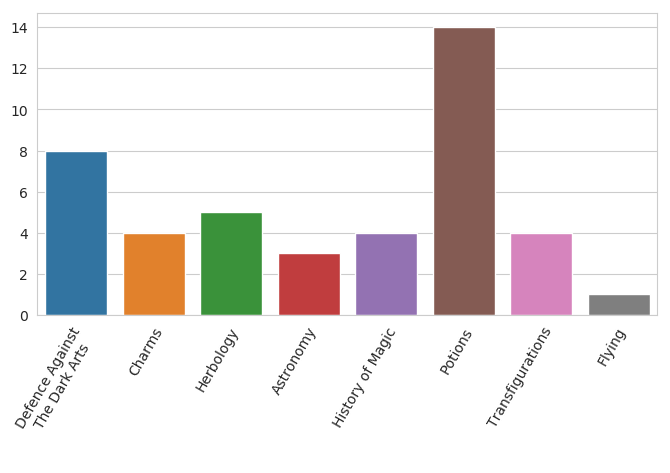

In [19]:
sub = ["Dark Arts", "Charms", "Herbology", "Astronomy", "History of Magic", "Potions", "Transfiguration", "Flying"]
xticks = ["Defence Against\nThe Dark Arts\n\n\n", "Charms\n", "Herbology\n\n", "Astronomy\n\n", "History of Magic\n\n\n", "Potions\n", "Transfigurations\n\n\n", "Flying\n"]
sub_count = [len(re.findall(s, book1)) for s in sub]

ax = plt.subplots(figsize=(8,4),dpi=100)
ax = sns.barplot(x=xticks, y=sub_count)
plt.xticks(rotation=60)

### Hero's Journey Breakdown

Status Quo: Chapter 1 (The Boy Who Lived) - Chapter 2 (The Vanishing Glass)
Call to Adventure: Chapter 3 (The Letters From No One) - Chapter 4 (The Keeper Of The Keys)
Assistance: Chapter 5 (Diagon Alley)
Departure: Chapter 6 (The Journey from Platform Nine and Three-Quarters)
Trials: Chapter 7 (The Sorting Hat) - Chapter 15 (The Forbidden Forest)
Approach: Chapter 16 (Through the Trapdoor)
Crisis: Chapter 17 (The Man With Two Faces)[0:81]
Treasure: Chapter 17 (The Man With Two Faces)[81:102]
Result: Chapter 17 (The Man With Two Faces)[102:203]
Return: Chapter 17 (The Man With Two Faces)[203:213]
New Life: Chapter 17 (The Man With Two Faces)[213:228]
Resolution: Chapter 17 (The Man With Two Faces)[229]

In [171]:
heros_journey_wc = {
    'Status Quo': 0, 'Call to Adventure': 0, 'Assistance': 0, 'Departure': 0, 'Trials': 0, 
    'Approach': 0, 'Crisis': 0, 'Treasure': 0, 'Result': 0, 'Return': 0, 'New Life': 0, 'Resolution': 0
}

In [172]:
num_ch = HP.num_chapters
for i in range(1, num_ch+1):
    text = HP.get(i, 'b')
    if i == 1 or i == 2:
        heros_journey_wc['Status Quo'] += len((' '.join(text)).split(' '))
    elif i == 3 or i == 4:
        heros_journey_wc['Call to Adventure'] += len((' '.join(text)).split(' '))
    elif i == 5:
        heros_journey_wc['Assistance'] += len((' '.join(text)).split(' '))
    elif i == 6:
        heros_journey_wc['Departure'] += len((' '.join(text)).split(' '))
    elif i in range(7, 16):
        heros_journey_wc['Trials'] += len((' '.join(text)).split(' '))
    elif i == 16:
        heros_journey_wc['Approach'] += len((' '.join(text)).split(' '))
    elif i == 17:
        heros_journey_wc['Crisis'] += len((' '.join(text[0:81])).split(' '))
        heros_journey_wc['Treasure'] += len((' '.join(text[81:102])).split(' '))
        heros_journey_wc['Result'] += len((' '.join(text[102:203])).split(' '))
        heros_journey_wc['Return'] += len((' '.join(text[203:213])).split(' '))
        heros_journey_wc['New Life'] += len((' '.join(text[213:228])).split(' '))
        heros_journey_wc['Resolution'] += len((''.join(text[228])).split(' '))

In [173]:
heros_journey_wc

{'Status Quo': 8138,
 'Call to Adventure': 7665,
 'Assistance': 6668,
 'Departure': 6356,
 'Trials': 37694,
 'Approach': 6537,
 'Crisis': 1950,
 'Treasure': 411,
 'Result': 2776,
 'Return': 245,
 'New Life': 180,
 'Resolution': 42}

### Parts-of-speech Tagging

In [68]:
nouns = []
adjectives = []
verbs = []
num_ch = HP.num_chapters
for i in range(1, num_ch+1):
    tagged = nltk.pos_tag(nltk.word_tokenize(HP.get(i, 'plain')))
    nouns.append(len([tup[0] for tup in tagged if (tup[0] not in ['Mr.', 'Mrs.']) and re.findall("^NNP.*", tup[1])]))
    adjectives.append(len([tup[0] for tup in tagged if re.findall("^J.*", tup[1])]))
    verbs.append(len([tup[0] for tup in tagged if re.findall("^VB.*", tup[1])]))
    
print("Nouns: ", nouns)
print("Adjectives: ", adjectives)
print("Verbs: ", verbs)

Nouns:  [308, 299, 366, 326, 690, 605, 420, 299, 512, 413, 420, 448, 403, 352, 461, 563, 551]
Adjectives:  [280, 189, 222, 227, 458, 351, 306, 171, 224, 241, 170, 302, 152, 180, 323, 351, 305]
Verbs:  [1011, 718, 785, 788, 1354, 1410, 908, 646, 1134, 941, 747, 1226, 722, 796, 1193, 1555, 1239]


In [69]:
pos_data = zip(pd.Series(nouns, index=list(range(1, num_ch+1))), pd.Series(adjectives, index=list(range(1, num_ch+1))),
            pd.Series(verbs, index=list(range(1, num_ch+1))))
pos_df = pd.DataFrame(data=pos_data, index=list(range(1, num_ch+1)), columns=["Nouns", "Adjectives", "Verbs"])

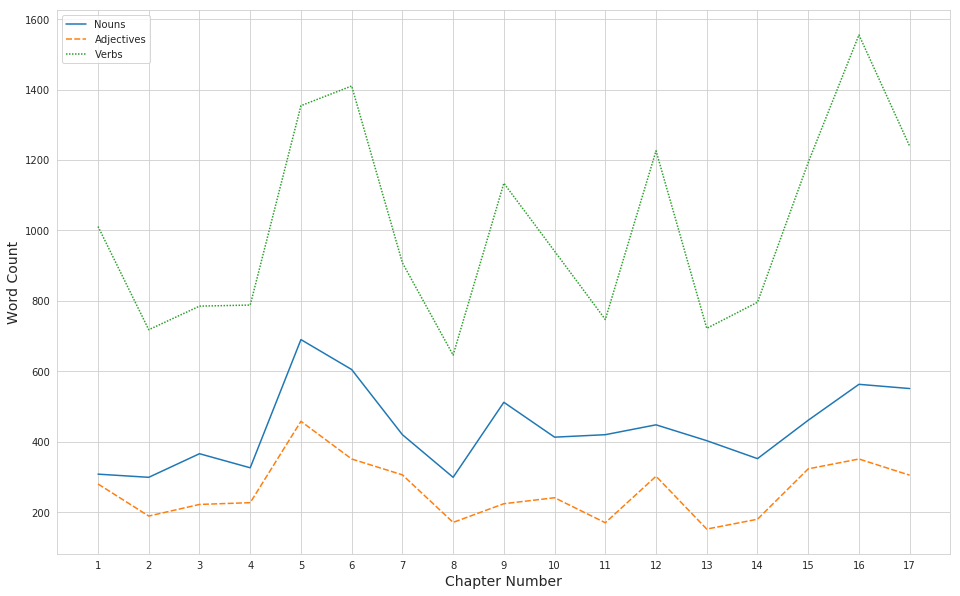

In [70]:
ax = sns.lineplot(data=pos_df)
ax.set_xlabel("Chapter Number", fontsize=14)
ax.set_ylabel("Word Count", fontsize=14)
_ = ax.set_xticks(list(range(1, (HP.num_chapters + 1))))

### Sentiment Analysis

In [94]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
compound = []
num_ch = HP.num_chapters
for i in range(1, num_ch+1):
    sentiments = {'compound': 0.0, 'neg': 0.0, 'neu': 0.0, 'pos': 0.0}
    sentence_list = HP.get(i, 'b')
    for sentence in sentence_list:
        vs = analyzer.polarity_scores(sentence)
        sentiments['compound'] += vs['compound']
        compound.append(vs['compound'])
        sentiments['neg'] += vs['neg']
        sentiments['neu'] += vs['neu']
        sentiments['pos'] += vs['pos']
        
    print(HP.get(i, 't'), ': ', sentiments['compound'] / len(sentence_list))
    sentiments['compound'] = sentiments['compound'] / len(sentence_list)
    
    sentiments['neg'] = sentiments['neg'] / len(sentence_list)
    sentiments['neu'] = sentiments['neu'] / len(sentence_list)
    sentiments['pos'] = sentiments['pos'] / len(sentence_list)

The Boy Who Lived :  0.11566363636363636
The Vanishing Glass :  -0.025093999999999998
The Letters From No One :  0.006996240601503751
The Keeper Of The Keys :  -0.0022908496732026162
Diagon Alley :  0.07937260273972602
The Journey from Platform Nine and Three-Quarters :  0.04954982578397212
The Sorting Hat :  0.08519518716577544
The Potions Master :  0.05562173913043478
The Midnight Duel :  -0.005507109004739335
Halloween :  0.05230670731707318
Quidditch :  -0.007622627737226277
The Mirror Of Erised :  0.062209223300970846
Nicholas Flamel :  0.01978467741935484
Norbert the Norwegian Ridgeback :  0.013903597122302158
The Forbidden Forest :  -0.10968670212765953
Through the Trapdoor :  0.026283125
The Man With Two Faces :  0.04831877729257641


In [90]:
#sum(map(lambda x:x,compound[64:128]))

In [91]:
def sumRange(L,a,b):                                                                                                                                                                                                
    sum = 0                                                                                                                                                                                                         
    for i in range(a,b,1):                                                                                                                                                                                        
        sum += L[i]                                                                                                                                                                                                  
    return sum

indicies, bins = ([] for i in range(2))
parts = int(len(compound)/256)
for i in range(0,256):
    indicies.append((i*parts + (i+1)*parts)/2)
    bins.append(sumRange(compound, i*parts, (i+1)*parts)/12)
    

In [92]:
sum(compound)/len(compound)

0.029839648437499856

Text(0, 0.5, 'Sentiment')

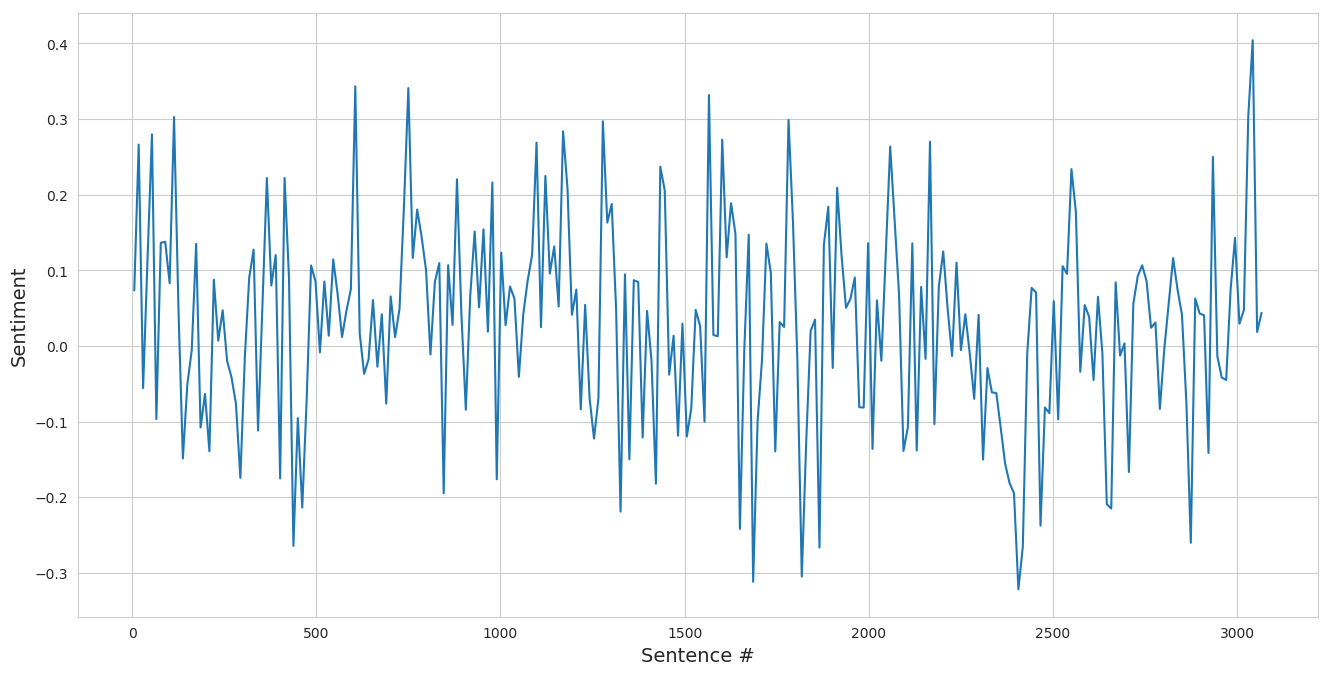

In [93]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(16,8),dpi=100)
ax = sns.lineplot(x=indicies, y=bins)
ax.set_xlabel("Sentence #", fontsize=14)
ax.set_ylabel("Sentiment", fontsize=14)